In [53]:
import numpy as np
import matplotlib . pyplot as plt
import random
random . seed (0) # please do not remove this line
%matplotlib inline

def load_data_from_file ( fileName = "/content/advertising.csv") :
    data = np . genfromtxt ( fileName , dtype = None , delimiter =',', skip_header =1)
    features_X = data [: , :3]
    sales_Y = data [: , 3]

    bias=np.ones((len(features_X),1))
    features_X=np.append(bias,features_X,axis=1)

    return features_X , sales_Y

In [54]:
features_X , sales_Y=load_data_from_file()

In [55]:
features_X , _ = load_data_from_file ()
print ( features_X [:5 ,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [56]:
_ , sales_Y = load_data_from_file ()
print ( sales_Y . shape )

(200,)


In [57]:
def create_individual ( n =4 , bound =10) :
    individual = []
    for i in range(n):
      individual.append(random.uniform(-bound/2,bound/2))
    return individual
individual = create_individual ()
print ( individual )

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [58]:
features_X , sales_Y = load_data_from_file ()
def compute_loss ( individual ) :
    theta = np . array ( individual )
    y_hat = features_X . dot ( theta )
    loss = np . multiply (( y_hat - sales_Y ) , ( y_hat - sales_Y ) ) . mean ()
    return loss
def compute_fitness ( individual ) :
    loss = compute_loss ( individual )
    fitness_value =1/(1+loss)
    return fitness_value

In [59]:
features_X , sales_Y = load_data_from_file ()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


In [60]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    for i in range(len(individual1_new)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new

In [61]:
# question 5
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [71]:
def mutate(individual, mutation_rate=0.02):
    individual_m = individual.copy()

    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] = random.uniform(-5, 5)
    return individual_m

In [63]:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [64]:
def initializePopulation ( m ) :
    population = [ create_individual () for _ in range ( m ) ]
    return population

In [65]:
def selection ( sorted_old_population , m = 100) :
    index1 = random . randint (0 , m -1)
    while True :
      index2 = random . randint (0 , m -1)
      if ( index2 != index1 ) :
           break
    individual_s = sorted_old_population [ index1 ]
    if index2 > index1 :
          individual_s = sorted_old_population [ index2 ]
    return individual_s

In [91]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    # Sort by fitness descending (higher fitness is better)
    sorted_population = sorted(old_population, key=compute_fitness, reverse=True)

    # Report best loss (the best individual should be at the top)
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[0]), "with chromosome:", sorted_population[0])

    new_population = []
    # Retain the best `elitism` individuals from the previous generation
    for ind in sorted_population[:elitism]:
        new_population.append(ind)

    # Fill the rest of the new population
    while len(new_population) < m:
        # Selection
        individual_1 = selection(sorted_population)
        individual_2 = selection(sorted_population)
        # Crossover
        individual_c1, individual_c2 = crossover(individual_1, individual_2)
        # Mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        new_population.append(individual_m1)
        if len(new_population) < m:
            new_population.append(individual_m2)

    return new_population, compute_loss(sorted_population[0])

In [67]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 981739.4583135801 with chromosome: [4.09, 4.82, 3.1, 4.02]


In [96]:
def run_GA():
    n_generations = 100
    m = 600
    load_data_from_file()
    population = initializePopulation ( m )
    losses_list = []

    for i in range(n_generations):
        new_population, loss = create_new_population(population, gen=i)
        losses_list.append(loss)
        population = new_population

    return population,losses_list

Best loss: 1138.5917848042752 with chromosome: [-1.97860006628791, 0.3835750169681962, -0.8050263022799298, -0.3913261649058093]
Best loss: 894.5828619388252 with chromosome: [4.038816553804578, -0.21158051780594533, 1.2955278749623567, 0.10107895717981208]
Best loss: 540.6354119538814 with chromosome: [-0.27639475499396227, -0.12542598091838641, 1.262422558446488, -0.09313539363759382]
Best loss: 540.6354119538814 with chromosome: [-0.27639475499396227, -0.12542598091838641, 1.262422558446488, -0.09313539363759382]
Best loss: 540.6354119538814 with chromosome: [-0.27639475499396227, -0.12542598091838641, 1.262422558446488, -0.09313539363759382]
Best loss: 540.6354119538814 with chromosome: [-0.27639475499396227, -0.12542598091838641, 1.262422558446488, -0.09313539363759382]
Best loss: 540.6354119538814 with chromosome: [-0.27639475499396227, -0.12542598091838641, 1.262422558446488, -0.09313539363759382]
Best loss: 540.6354119538814 with chromosome: [-0.27639475499396227, -0.1254259809

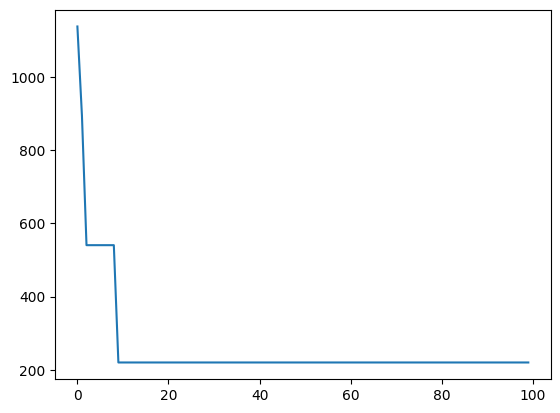

In [97]:
import matplotlib . pyplot as plt
def visualize_loss ( losses_list ) :
    plt . plot ( losses_list )


population,losses_list = run_GA ()
visualize_loss ( losses_list )

In [ ]:
population

[-1.496630916025059, 0.19939274473710888, 0.06518188009177361, -0.3562028012262841]


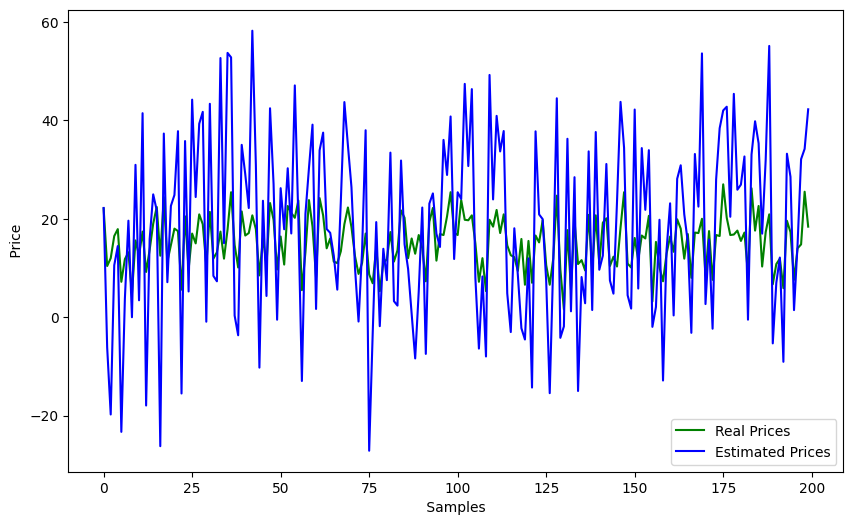

In [98]:
def visualize_predict_gt () :
      # visualization of ground truth and predict value

      sorted_population = sorted ( population , key = compute_fitness )
      print ( sorted_population [ -1])
      theta = np . array ( sorted_population [ -1])
      estimated_prices = []
      for feature in features_X :
          estimated_prices . append ( feature . dot ( theta ) )
      fig , ax = plt . subplots ( figsize =(10 , 6) )
      plt . xlabel ( ' Samples ')
      plt . ylabel ( ' Price ')
      plt . plot ( sales_Y , c = 'green' , label = 'Real Prices')
      plt . plot ( estimated_prices , c = 'blue', label ='Estimated Prices')
      plt . legend ()
      plt . show ()
visualize_predict_gt ()